# Lab session
The main tasks are:
1. testing for unit roots
2. applying cointegration tests and modelling cointegrated systems

Why we care about stationarity of the data:
- The nonstationary time series implies that the effects of shocks will persist over the long run, which may not be true in the financial data.
- The use of nonstationary data in the regression can lead to spurious regression.

# Testing for Unit Roots
We focus on how we can test whether a data series is stationary or not.
Use the same data on UK house prices as employed previously, 'UKHP.xlsx'

**Important packages:**
**Statsmodels** is a Python package that allows users to explore data, estimate statistical models, and perform statistical tests. An extensive list of descriptive statistics, statistical tests, plotting functions, and result statistics are available for different types of data and each estimator. We use this package a lot in the following.
**arch** includes autoregressive Conditional Heteroskedasticity (ARCH) and other tools for financial econometrics.

In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from arch.unitroot import ADF
import matplotlib.pyplot as plt
%matplotlib inline

UKHP=pd.read_excel('https://raw.githubusercontent.com/HeyyNing/labs/main/lab1/UKHP.xls',
                   index_col=0)

<Axes: xlabel='Month'>

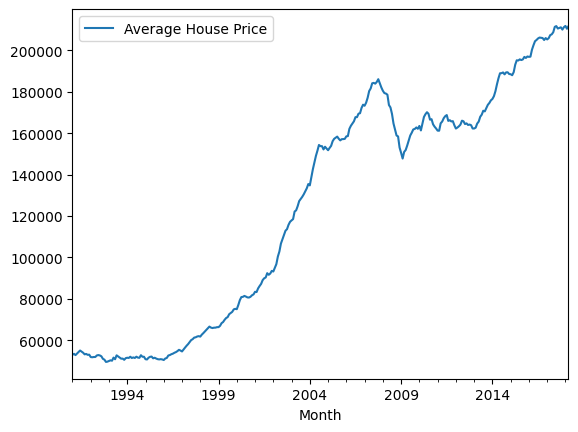

In [5]:
UKHP.plot() # plot the series

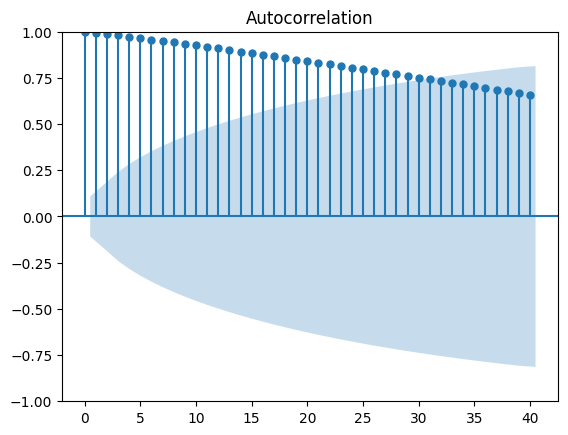

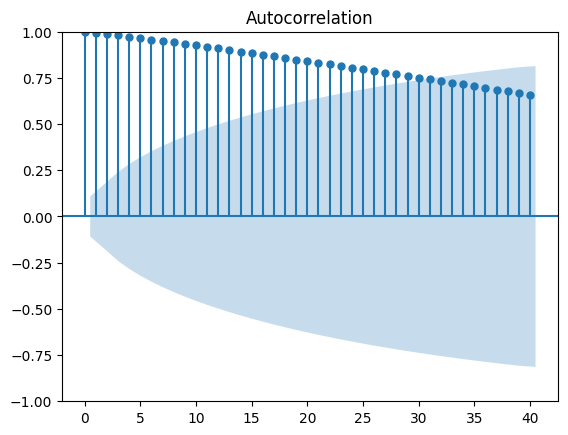

In [11]:
sm.graphics.tsa.plot_acf(UKHP,alpha=0.05, lags=40) # plot the autocorrelation function

## Augmented Dickey-Fuller Testing

The Augmented Dickey-Fuller test is the most common unit root test used. The null is that the series contains a unit root, and the (one-sided) alternative is that the series is stationary. One specification could be (no constant and no trend terms):
$/delta y_{t} = /phi y_{t-1} + \sum^{p}_{i=1}\alpha_i/delta y_{t-i} + u_t$

By default, the number of lags is selected by minimizing the AIC across a range of lag lengths (which can be set using max_lag when initializing the model). Additionally, the basic test includes a constant in the ADF regression.

If we keep the default of including a constant, we obtain the below output:

In [19]:
adf = ADF(UKHP)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -0.200
P-value                         0.939
Lags                               15
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


The above results indicate that the null hypothesis of a unit root in the house price series cannot be rejected (i.e. UKHP is nonstationary), as the test statistic -0.2 is larger than the critical value of -2.87 at 5% level.

The ADF uses a standard regression when computing results. These can be accesses using regression:

In [20]:
reg_res = adf.regression
print(reg_res.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     13.28
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.62e-26
Time:                        07:56:11   Log-Likelihood:                -2609.6
No. Observations:                 311   AIC:                             5253.
Df Residuals:                     294   BIC:                             5317.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0002      0.001     -0.200      0.8

Plot the regression residuals:

<Axes: >

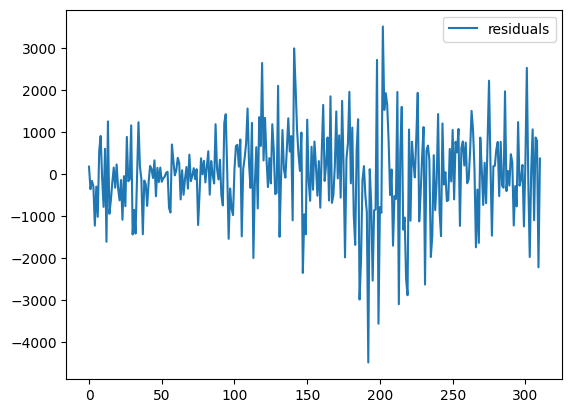

In [21]:
resids = pd.DataFrame(reg_res.resid)
resids.columns = ["residuals"]
resids.plot()

Alternatively, we can run the *Phillips-Perron* unit root test. The null hypothesis of the Phillips-Perron (PP) test is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then the null cannot be rejected that there and the series appears to be a unit root.

Unlike the ADF test, the regression estimated includes only one lag of the dependant variable, in addition to trend terms. Any serial correlation in the regression errors is accounted for using a long-run variance estimator (currently Newey-West).

In [29]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(UKHP, trend='c')
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -0.057
P-value                         0.954
Lags                               17
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


## Dickey-Fuller GLS Testing
The Dickey-Fuller GLS test is an improved version of the ADF which uses a GLS-detrending regression before running an ADF regression with no additional deterministic terms. This test is only available with a constant or constant and time trend (trend='c' or trend='ct').

We test for the constant and time trend using the DF GLS test below:

In [26]:
from arch.unitroot import DFGLS

dfgls = DFGLS(UKHP,trend="ct")
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -1.269
P-value                         0.711
Lags                               15
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.48 (1%), -2.91 (5%), -2.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [25]:
dfgls_reg = dfgls.regression
print(dfgls_reg.summary().as_text())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.480
Model:                            OLS   Adj. R-squared (uncentered):              0.451
Method:                 Least Squares   F-statistic:                              17.00
Date:                Tue, 10 Oct 2023   Prob (F-statistic):                    3.16e-33
Time:                        08:52:01   Log-Likelihood:                         -2612.2
No. Observations:                 311   AIC:                                      5256.
Df Residuals:                     295   BIC:                                      5316.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Now we repeat all of the above steps for the returns on the house price series dhp. The output would appear as below:

In [17]:
dhp = UKHP.pct_change().round(3) # get return series
dhp.dropna(inplace=True) # drop NAN values
adf = ADF(dhp)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.286
P-value                         0.016
Lags                               17
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


We find that the null hypothesis of a unit root can be rejected for the returns on the house price series at the 5% level.

## Cointegration
y and x are cointegrated if both of following are true:
1. y is nonstationary; x is nonstationary
2. There exists a linear combination of y and x that is stationary
In other words, two series are cointegrated if they are nonstationary and related. Different from spurious regression, when y and x are cointegrated, regressing y onto x makes sense, because the coefficient estimate will converge to the true value super fast. Please note that the hypothesis testing here for the coefficient do not rely on the normal distribution

(1) Engle-Granger Test for Cointegration
The Engle-Granger cointegration test (1987, Econometrica) is essentially the unit root test applied to the residual of cointegration regression. The null hypothesis is that the series are NOT cointegrated.
- The series are cointegrated if the residual has no unit root
- The series are not cointegrated (and the regression is spurious) if the residual has unit root


## Big Picture of Multivariate Model
1. We can apply VAR if series are stationary
2. We can apply VAR to differenced series if they are nonstationary and not cointegrated
3. We need to apply vector error correction model if series are nonstationary and cointegrated